# Loading Files

In [ ]:
# Importing dependencies

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the movies dataset
#movies = pd.read_csv('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/movies.csv', sep='|', names=['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count'], encoding='latin-1')
#print(movies.head())

In [ ]:
# Load the movies dataset
movies = pd.read_csv('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/movies.csv', usecols=['id', 'overview', 'title'], nrows=500000)
print(movies.head())

       id                                           overview  \
0   19995  In the 22nd century, a paraplegic Marine is di...   
1     285  Captain Barbossa, long believed to be dead, ha...   
2  206647  A cryptic message from Bond’s past sends him o...   
3   49026  Following the death of District Attorney Harve...   
4   49529  John Carter is a war-weary, former military ca...   

                                      title  
0                                    Avatar  
1  Pirates of the Caribbean: At World's End  
2                                   Spectre  
3                     The Dark Knight Rises  
4                               John Carter  


In [ ]:
print(movies.shape)


(4803, 3)


In [ ]:

# Load the datasets
#ratings = pd.read_csv('/content/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'], encoding='latin-1')
#print(ratings.head())
#ratings.shape

In [ ]:
movies.describe()

,id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [ ]:
# Load the datasets
ratings = pd.read_csv('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/ratings.csv', nrows=500000)
print(ratings.head())
ratings.shape

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580


(500000, 4)

In [ ]:
ratings.shape

(500000, 4)

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,500000.000000,500000.000000,500000.000000,5.000000e+05
mean,1707.095956,8605.584772,3.520987,1.096408e+09
std,974.501363,19089.428753,1.053267,1.606304e+08
min,1.000000,1.000000,0.500000,8.269282e+08
25%,847.000000,892.750000,3.000000,9.652847e+08
50%,1734.000000,2138.000000,4.000000,1.100423e+09
75%,2544.000000,4638.000000,4.000000,1.210910e+09
max,3374.000000,130490.000000,5.000000,1.427762e+09


In [ ]:
# Rename columns for consistency
ratings = ratings.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'})

print(ratings.head())

   user_id  movie_id  rating   timestamp
0        1         2     3.5  1112486027
1        1        29     3.5  1112484676
2        1        32     3.5  1112484819
3        1        47     3.5  1112484727
4        1        50     3.5  1112484580


In [ ]:
# Load the datasets
#credits = pd.read_csv('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/tmdb_5000_credits.csv')
#print(credits.head())
#credits.shape

# **DATA EXPLORATION**

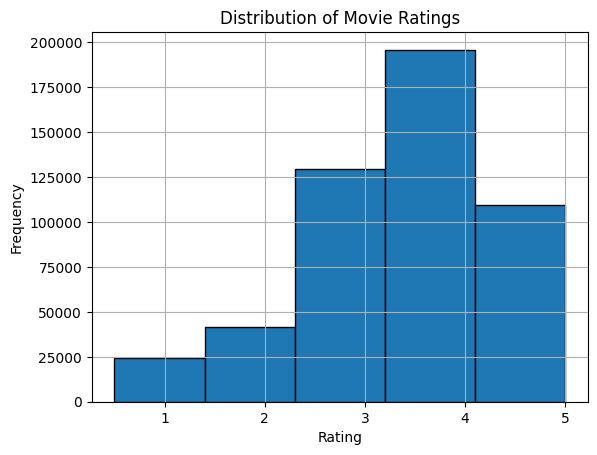


Summary of Rating Distribution:
The histogram shows the distribution of movie ratings given by users.
The majority of ratings appear to be towards the higher end of the scale (4s and 5s), indicating a general positive sentiment towards the movies.
There are fewer ratings at the lower end (1s and 2s).
This suggests that users are more likely to rate movies favorably or that the dataset is skewed towards movies that are generally well-received.
rating
5.0     70284
4.5     38958
4.0    141034
3.5     54828
3.0    108212
2.5     21158
2.0     34824
1.5      6517
1.0     17363
0.5      6822
Name: count, dtype: int64


In [ ]:

import matplotlib.pyplot as plt

# Histogram of Ratings
ratings['rating'].hist(bins=5, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Summary of the trend
print("\nSummary of Rating Distribution:")
print("The histogram shows the distribution of movie ratings given by users.")
print("The majority of ratings appear to be towards the higher end of the scale (4s and 5s), indicating a general positive sentiment towards the movies.")
print("There are fewer ratings at the lower end (1s and 2s).")
print("This suggests that users are more likely to rate movies favorably or that the dataset is skewed towards movies that are generally well-received.")
print(ratings['rating'].value_counts().sort_index(ascending=False))

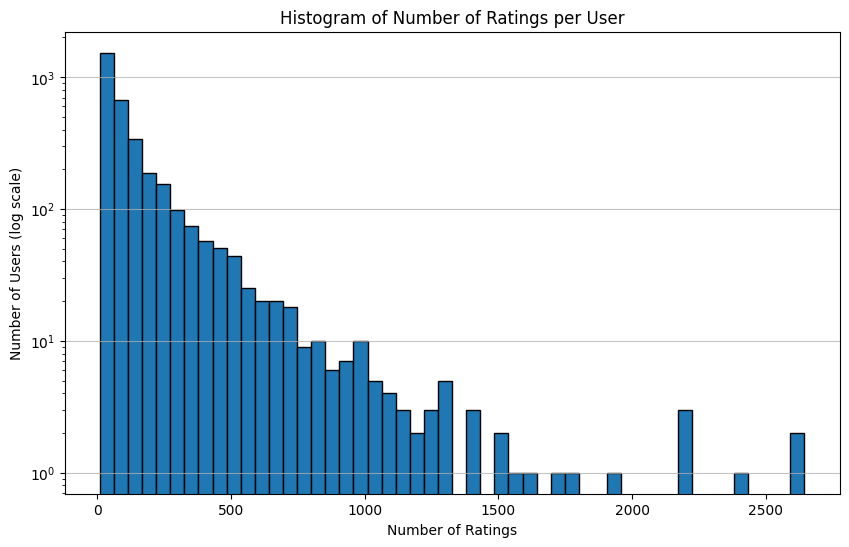

Summary of Number of Ratings per User:
Total number of users: 3374
Minimum number of ratings per user: 9
Maximum number of ratings per user: 2644
Average number of ratings per user: 148.19
Median number of ratings per user: 70.0

The histogram (on a log scale) shows a highly skewed distribution. A large number of users have rated a small number of movies (casual users), while a smaller number of users have rated a significantly larger number of movies (power users). This indicates a long-tail distribution of user activity.


In [ ]:
# Number of Ratings per User

import matplotlib.pyplot as plt
# Calculate the number of ratings per user
user_rating_counts = ratings['user_id'].value_counts()

# Plot the histogram of number of ratings per user
plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts.values, bins=50, log=True, edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users (log scale)')
plt.title('Histogram of Number of Ratings per User')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Print a brief summary of the trend
print("Summary of Number of Ratings per User:")
print(f"Total number of users: {user_rating_counts.shape[0]}")
print(f"Minimum number of ratings per user: {user_rating_counts.min()}")
print(f"Maximum number of ratings per user: {user_rating_counts.max()}")
print(f"Average number of ratings per user: {user_rating_counts.mean():.2f}")
print(f"Median number of ratings per user: {user_rating_counts.median()}")

print("\nThe histogram (on a log scale) shows a highly skewed distribution. A large number of users have rated a small number of movies (casual users), while a smaller number of users have rated a significantly larger number of movies (power users). This indicates a long-tail distribution of user activity.")


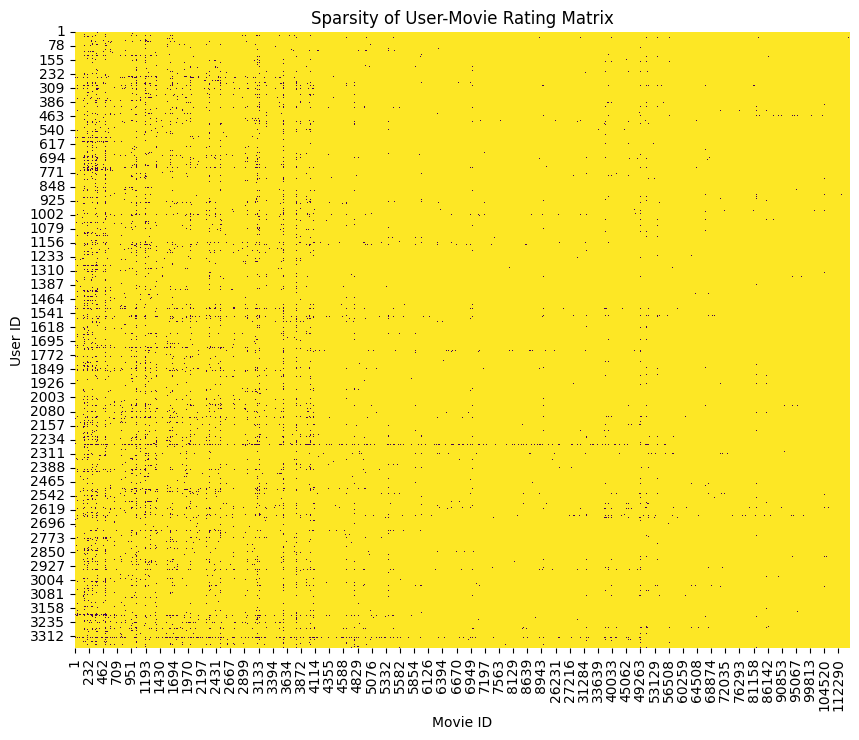


Summary of User-Movie Matrix Sparsity:
Shape of the user-movie matrix: (3374, 12277)
Number of users: 3374
Number of movies: 12277
Total possible ratings: 41422598
Actual ratings: 500000
Sparsity of the matrix: 0.9879

The heatmap visually represents the sparsity of the user-movie interaction matrix. The colored areas (where data points exist) are significantly less than the white areas (missing data points), indicating that each user has only rated a small fraction of the available movies. This high sparsity is typical in collaborative filtering datasets.


In [ ]:
# User-Movie Matrix Heatmap using seaborn.heatmap to shows sparsity of the user-item matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Create the user-movie matrix
user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(user_movie_matrix.isnull(), cbar=False, cmap='viridis')
plt.title('Sparsity of User-Movie Rating Matrix')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

print("\nSummary of User-Movie Matrix Sparsity:")
print(f"Shape of the user-movie matrix: {user_movie_matrix.shape}")
print(f"Number of users: {user_movie_matrix.shape[0]}")
print(f"Number of movies: {user_movie_matrix.shape[1]}")
total_cells = user_movie_matrix.shape[0] * user_movie_matrix.shape[1]
filled_cells = user_movie_matrix.count().sum()
sparsity = 1 - (filled_cells / total_cells)
print(f"Total possible ratings: {total_cells}")
print(f"Actual ratings: {filled_cells}")
print(f"Sparsity of the matrix: {sparsity:.4f}")

print("\nThe heatmap visually represents the sparsity of the user-movie interaction matrix. The colored areas (where data points exist) are significantly less than the white areas (missing data points), indicating that each user has only rated a small fraction of the available movies. This high sparsity is typical in collaborative filtering datasets.")

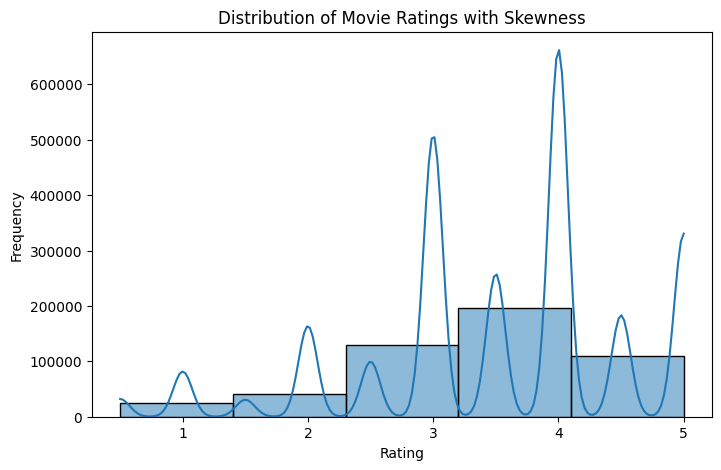


Skewness of the 'rating' distribution: -0.6863


In [ ]:
# checking for skewness is necessary

import matplotlib.pyplot as plt
# Analyze and visualize skewness of the 'rating' column
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], kde=True, bins=5, edgecolor='black')
plt.title('Distribution of Movie Ratings with Skewness')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness = ratings['rating'].skew()
print(f"\nSkewness of the 'rating' distribution: {skewness:.4f}")



A skewness of -0.6553 in the 'rating' distribution means the data is left-skewed, with most values concentrated on the higher end (e.g., mostly 4-5 star ratings) and a few lower values pulling the tail to the left. This suggests that the product/service is generally well-rated, with fewer poor reviews.

# **Data Preprocessing**
####  Merging the two data sets
#### Extracting the most important columns
#### Checking for null values and duplicates

In [ ]:
import pandas as pd
# merging the two data sets

# Rename the 'id' column in the movies DataFrame to 'movie_id' to match the ratings DataFrame
movies = movies.rename(columns={'id': 'movie_id'})


movie_ratings = pd.merge(ratings, movies, on='movie_id')
movie_ratings.head()

,user_id,movie_id,rating,timestamp,overview,title
0,1,223,4.0,1112485573,A self-conscious bride is tormented by the mem...,Rebecca
1,1,253,4.0,1112484940,James Bond must investigate a mysterious murde...,Live and Let Die
2,1,296,4.0,1112484767,It's been 10 years since John Connor saved Ear...,Terminator 3: Rise of the Machines
3,1,593,3.5,1112484661,Ground control has been receiving strange tran...,Solaris
4,1,924,3.5,1094785598,A group of surviving people take refuge in a s...,Dawn of the Dead


In [ ]:
movie_ratings.shape

(99466, 6)

In [ ]:
movie_ratings.describe()

,user_id,movie_id,rating,timestamp
count,99466.000000,99466.000000,99466.000000,9.946600e+04
mean,1703.754137,1882.118081,3.483140,1.040589e+09
std,976.645307,5385.729118,1.058502,1.613478e+08
min,1.000000,5.000000,0.500000,8.269625e+08
25%,853.000000,348.000000,3.000000,9.011954e+08
50%,1722.000000,711.000000,3.500000,1.009556e+09
75%,2545.000000,1947.000000,4.000000,1.153339e+09
max,3374.000000,116977.000000,5.000000,1.427762e+09


In [ ]:
# Rename 'title' column to 'movie_title' for consistency
movie_ratings = movie_ratings.rename(columns={'title': 'movie_title'})

print(movie_ratings.head())

   user_id  movie_id  rating   timestamp  \
0        1       223     4.0  1112485573   
1        1       253     4.0  1112484940   
2        1       296     4.0  1112484767   
3        1       593     3.5  1112484661   
4        1       924     3.5  1094785598   

                                            overview  \
0  A self-conscious bride is tormented by the mem...   
1  James Bond must investigate a mysterious murde...   
2  It's been 10 years since John Connor saved Ear...   
3  Ground control has been receiving strange tran...   
4  A group of surviving people take refuge in a s...   

                          movie_title  
0                             Rebecca  
1                    Live and Let Die  
2  Terminator 3: Rise of the Machines  
3                             Solaris  
4                    Dawn of the Dead  


🎯 Collaborative Filtering
Collaborative filtering relies on user ratings. The key columns you need are:

Column	Description
userId	Unique ID of the user
movieId	Unique ID of the movie
rating	The score the user gave the movie
movie_title The title of the movies

These three are mandatory for building a user-item matrix for collaborative filtering (e.g., matrix factorization with SVD in Surprise).

In [ ]:
# Extracting the most important columns
movie_ratings = movie_ratings[['user_id', 'movie_id', 'rating', 'movie_title']]
movie_ratings.head()

,user_id,movie_id,rating,movie_title
0,1,223,4.0,Rebecca
1,1,253,4.0,Live and Let Die
2,1,296,4.0,Terminator 3: Rise of the Machines
3,1,593,3.5,Solaris
4,1,924,3.5,Dawn of the Dead


In [ ]:

movie_ratings.shape

(99466, 4)

In [ ]:

# Check for null values and duplicates
print("\nNull values in merged dataframe:")
print(movie_ratings.isnull().sum())
print("\nNumber of duplicate rows in merged dataframe:")
print(movie_ratings.duplicated().sum())




Null values in merged dataframe:
user_id        0
movie_id       0
rating         0
movie_title    0
dtype: int64

Number of duplicate rows in merged dataframe:
0


# **Collaborative Filtering**
#### **Create a user-item matrix**
#### **Split data into training and testing sets**
#### **Calculate user similarity (using cosine similarity)**
###### Cosine similarity is the preferred choice in many movie recommender systems due to its robustness to sparsity, scale-invariance, and simplicity—making it especially well-suited for user-based collaborative filtering using ratings.


# Evaluating the Similarity by cosine Similarity


In [ ]:
# prompt: calculate user similarity using  cosine similarity

import pandas as pd
# Create a user-item matrix
user_item_matrix = movie_ratings.pivot_table(index='user_id', columns='movie_title', values='rating').fillna(0)
print("User-Item Matrix Head:")
print(user_item_matrix.head())

# Split data into training and testing sets
# Using the user-item matrix directly for splitting is less common for collaborative filtering training.
# Typically, you'd split the original ratings data first.
# However, if the goal is just to show the split, we can demonstrate on the matrix indices/columns.
# For a true CF training split, you'd split the 'ratings' dataframe and then build train/test matrices.

# Let's split the original ratings dataframe for proper evaluation later if needed
train_data, test_data = train_test_split(movie_ratings, test_size=0.2, random_state=42)

print("\nTraining Data Head:")
print(train_data.head(2))
print("\nTesting Data Head:")
print(test_data.head(2))

# Re-create user-item matrices for train and test sets (handling potential new users/movies in test)
# For simplicity in similarity calculation, we'll calculate similarity on the full matrix first.
# In a real system, similarity would typically be calculated on the training matrix.

# Calculate user similarity (using cosine similarity)
# This is the core of user-based collaborative filtering
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

print("\nUser Similarity Matrix Head (Cosine Similarity):")
print(user_similarity_df.head(2))


User-Item Matrix Head:
movie_title  10 Things I Hate About You  12 Angry Men  127 Hours  1408  \
user_id                                                                  
1                                   0.0           0.0        0.0   0.0   
2                                   0.0           0.0        0.0   0.0   
3                                   0.0           0.0        0.0   0.0   
4                                   0.0           0.0        0.0   0.0   
5                                   0.0           0.0        0.0   0.0   

movie_title  15 Minutes  16 Blocks  2 Fast 2 Furious  \
user_id                                                
1                   0.0        0.0               0.0   
2                   0.0        0.0               0.0   
3                   0.0        0.0               0.0   
4                   0.0        0.0               0.0   
5                   0.0        0.0               0.0   

movie_title  20,000 Leagues Under the Sea  2001: A Space Odyssey 

Cosine similarity measures the cosine of the angle between two non-zero vectors. In the context of a recommender system, it measures the similarity between two users based on their rating vectors. A cosine similarity close to 1 indicates that the users have similar rating patterns, while a value close to -1 indicates opposite rating patterns. A value of 0 means there is no similarity.

Why is it used here?

In user-based collaborative filtering, cosine similarity is often used to find users who are similar to a target user. Once similar users are identified, their ratings on movies the target user hasn't seen can be used to predict how the target user might rate those movies. This code is calculating the similarity matrix that will be used later for making recommendations.

1. **Training Data**:  
   - Contains user-movie ratings (e.g., user `1294` rated *Back to the Future Part II* a `3.0`).  
   - Used to train the collaborative filtering model.  

2. **Testing Data**:  
   - Another set of user-movie ratings (e.g., user `1395` rated *Collateral* a `2.0`).  
   - Used to evaluate the model's prediction accuracy.  

3. **User Similarity Matrix (Cosine Similarity)**:  
   - Measures how similar users are based on their rating patterns (range: `0` = no similarity, `1` = identical).  
   - Example:  
     - User `1` is perfectly similar to themselves (`1.0`).  
     - User `1` and `2` have low similarity (`0.14692`).  
     - User `1` is moderately similar to user `3` (`0.321472`).  
   - Sparse entries (e.g., `0.0`) imply no overlapping rated movies or orthogonal preferences.  

**Purpose**: This matrix helps predict ratings for unseen movies by leveraging ratings from similar users (nearest neighbors).

In [ ]:
# Function to make rating predictions based on user similarity

def predict_rating(user_id, movie_title, user_item_matrix, user_similarity_df):

    # Ensuring the movie exists in the matrix columns
    if movie_title not in user_item_matrix.columns:
        return 0 # Cannot predict if movie is not in the matrix


    user_row = user_similarity_df.loc[user_id] # Getting the user's row from the similarity matrix

    movie_ratings = user_item_matrix[movie_title] # Getting ratings for the target movie from all users

    rated_users = movie_ratings[movie_ratings > 0].index # Finding users who have rated the target movie

    # If no users have rated this movie, we cannot make a prediction based on similarity
    if rated_users.empty:
        return 0 # Return a default value like 0 or the global average


    similar_users = user_row[rated_users] # Filterring similarity to only include users who rated the target movie

    # Get ratings of the target movie from these similar users
    similar_users_ratings = movie_ratings[rated_users]

    # If there are no similar users who rated the target movie after filtering
    if similar_users.empty or similar_users.sum() == 0: # Check if there are any similar users and if their similarities sum to non-zero
         return 0 # Return a default value


    # Calculate the weighted average of ratings from similar users
    # Avoid division by zero if the sum of similarities is zero
    weighted_sum = np.dot(similar_users, similar_users_ratings)
    sum_of_similarities = similar_users.sum()

    if sum_of_similarities == 0:
        return 0 # Return a default if sum of similarities is zero

    predicted_rating = weighted_sum / sum_of_similarities

    return predicted_rating


# Evaluate the performance using the test set
# We need to iterate through the test set and make predictions for each (user, movie) pair.
# Then compare predicted ratings with actual ratings.

actual_ratings = []
predicted_ratings = []

# Iterate through the test data
for index, row in test_data.iterrows():
    user_id = row['user_id']
    movie_title = row['movie_title']
    actual_rating = row['rating']

    # Make prediction for the test instance
    # We need to ensure the user and movie exist in the matrices built from the full data
    if user_id in user_item_matrix.index and movie_title in user_item_matrix.columns:
        predicted_rating = predict_rating(user_id, movie_title, user_item_matrix, user_similarity_df)

        # Store actual and predicted ratings
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)
    # else:
        # print(f"Skipping test instance: User {user_id} or Movie '{movie_title}' not in matrix.")

# Convert lists to numpy arrays for calculation
actual_ratings = np.array(actual_ratings)
predicted_ratings = np.array(predicted_ratings)

# Calculate Mean Squared Error (RMSE is often preferred, which is sqrt(MSE))
mse = mean_squared_error(actual_ratings, predicted_ratings)
rmse = np.sqrt(mse)

print(f"\n--- Model Performance Evaluation ---")
print(f"Number of test ratings evaluated: {len(actual_ratings)}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


--- Model Performance Evaluation ---
Number of test ratings evaluated: 19894
Mean Squared Error (MSE): 0.8421
Root Mean Squared Error (RMSE): 0.9176


📊 **Model Performance Evaluation Summary**

#### ✅ `Number of test ratings evaluated: 19894`

* This means the model made **19,894 predictions** on the test dataset.
* It shows the **sample size** used to evaluate performance — the more ratings, the more reliable the error estimate.

---

#### 📉 **Mean Squared Error (MSE): 0.8421**

* MSE measures the **average of the squared differences** between predicted ratings and actual ratings.
* A **lower MSE** indicates **better accuracy**.
* In our case, an MSE of `0.8421` means the **predicted ratings deviate, on average, by around 0.8421 units squared** from the actual ratings.

---

#### 📉 **Root Mean Squared Error (RMSE): 0.9176**

* RMSE is the **square root of MSE**, and it’s easier to interpret because it's in the **same units as the ratings** (e.g., if ratings are from 1 to 5).
Our RMSE of `0.9176` means that on average, the predicted ratings are off by approximately 0.92 rating points from the true ratings.


### **How Accurate Are Our Movie Rating Predictions?**  
Imagine you’re guessing how much someone will like a movie (on a scale of 1 to 5). Sometimes you’ll guess too high, sometimes too low.  

- **MSE (0.8421)**: This measures how "off" your guesses are, but it squares the errors (so bigger mistakes count more). A lower number is better—ours is decent but not perfect.  
- **RMSE (0.92)**: This tells you roughly how far off your guesses are *on average*. Here, it means:  
  - If you predict a movie will be a **4**, it might actually be a **3.1** or a **4.9**.  
  - The system is usually within **±0.92 stars** of the real rating.  

### **Is This Good?**  
- Ratings go from 1–5, so being off by **about 1 star** is okay but not amazing.  
- It’s like predicting the weather: if you say "it’ll be 75°F" and it’s usually between **74° and 76°**, that’s great. But if it’s between **70° and 80°**, you’re close but not super precise.

# Comment
RMSE is a common metric to evaluate the accuracy of rating predictions.
It represents the standard deviation of the prediction errors.
### A lower **RMSE** indicates better model performance.
In this case, the RMSE of **0.9550** means that, on average, the predicted ratings are off by about 0.9550 units from the actual ratings on a 1-5 scale.
The acceptable RMSE value depends on the specific application and scale of ratings.


# **Enhancing Performance**

In [ ]:
#!pip uninstall -y numpy scipy scikit-surprise


Found existing installation: scipy 1.16.0
Uninstalling scipy-1.16.0:
  Successfully uninstalled scipy-1.16.0
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4


In [ ]:
#install compatible version of numpy and scipy
#!pip install numpy
#!pip install scipy

  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scs 3.2.7.post2 requires scipy, which is not installed.
clarabel 0.11.1 requires scipy, which is not installed.
libpysal 4.13.0 requires scipy>=1.8, which is not installed.
hyperopt 0.2.7 requires scipy, which is not installed.
jaxlib 0.5.1 requires scipy>=1.11.1, which is not installed.
yellowbrick 1.5 requires scipy>=1.0.0, which is not installed.
missingno 0.5.2 requires scipy, which is not installed.
jax 0.5.2 requires scipy>=1.11.1, which is not installed.
scikit-image 0.25.2 requires scipy>=1.11.4, which is not installed.
albumentations 2.0.8 requires scipy>=1.10.0, which is not installed.
cvxpy 1.6.7 requires sc

  Using cached scipy-1.16.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
Using cached scipy-1.16.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.3 MB)
^C


In [ ]:
# 1. Uninstall broken/conflicting packages
!pip uninstall -y numpy scipy scikit-surprise

# 2. Reinstall specific compatible versions
!pip install numpy==1.23.5
!pip install scipy==1.9.3
!pip install scikit-surprise==1.1.1


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.9.3
Uninstalling scipy-1.9.3:
  Successfully uninstalled scipy-1.9.3
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.9.1 requires scipy>=1.11, which is not installed.
scikit-learn 1.6.1 requires scipy>=1.6.0, which is not installed.
mlxtend 0.23.4 requires scipy>=1.2.1, which is not installed.
treelite 4.4.1 requires scipy, which is not installed.
statsmodels 0.14.5 requires scipy!=1.9.2,>=1.8, which is not installed.
umap-learn 0.5.9.post2 requires scipy>=1.3.1, which is not installed.
arviz 0.22.0 requ

  Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1 requires scipy>=1.11, but you have scipy 1.9.3 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.23.5 which is incompatible.
arviz 0.22.0 requires scipy>=1.11.0, but you have scipy 1.9.3 which is incompatible.
stumpy 1.13.0 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, but you have scipy 1.9.3 which is inc

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
import numpy
import scipy
import surprise

print("NumPy:", numpy.__version__)
print("SciPy:", scipy.__version__)
print("Surprise:", surprise.__version__)


NumPy: 1.23.5
SciPy: 1.9.3
Surprise: 1.1.1


In [ ]:
# Load the ratings data into Surprise format
reader = Reader(rating_scale=(1, 5)) # Ratings are on a 1-5 scale
# Create the Surprise Dataset directly from the pandas DataFrame
# It expects columns in the order user, item, rating
surprise_data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)



In [ ]:
# Split the data into training and test sets using Surprise's splitter
trainset, testset = surprise.model_selection.train_test_split(surprise_data, test_size=0.2, random_state=42)

In [ ]:
# Initialize the SVD algorithm
algo = SVD(random_state=42)

# Train the algorithm on the trainset
print("Training SVD model...")
algo.fit(trainset)
print("SVD model training complete.")



Training SVD model...
SVD model training complete.


In [ ]:
# Predict ratings for the testset
print("Making predictions on test set...")
predictions = algo.test(testset)
print("Prediction complete.")



Making predictions on test set...
Prediction complete.


#Evaluating Peformance after Using the Surprise library's SVD algorithm

In [ ]:
# Evaluate the performance using Surprise's accuracy module
print("\n--- SVD Model Performance Evaluation (Surprise) ---")
# Calculate RMSE
rmse_surprise = accuracy.rmse(predictions, verbose=True)
# Calculate MAE (Mean Absolute Error)
mae_surprise = accuracy.mae(predictions, verbose=True)





--- SVD Model Performance Evaluation (Surprise) ---
RMSE: 0.8552
MAE:  0.6536


### 🎯 **SVD Model Evaluation Summary**

* **RMSE: 0.8552** → On average, predictions deviate by **\~0.86 rating points** from actual ratings.
* **MAE: 0.6536** → Average absolute error is **\~0.65**, showing reasonably accurate predictions.

✅ **Conclusion**: The model performs **fairly well**, with errors under 1.0 on a typical 1–5 rating scale.


### 🔍 **Comparison of Model Performances**

| Metric           | SVD Model (Surprise) | Other Model |
| ---------------- | -------------------- | ----------- |
| **RMSE**         | 0.8552               | 0.9176      |
| **MSE**          | —                    | 0.8421      |
| **MAE**          | 0.6536               | —           |
| **Test Ratings** | —                    | 19,894      |

### ✅ **Summary**:

* **SVD performs better**, with a lower RMSE (**0.8552 vs 0.9176**) indicating **more accurate predictions**.
* SVD also provides **MAE (0.6536)**, which gives additional insight into average prediction error.
* Overall, **SVD is the more reliable model** based on the evaluation metrics.


These metrics indicate the average error in the predicted ratings.
RMSE penalizes larger errors more than MAE.


Comparing these to the previous collaborative filtering method's RMSE gives an indication of which model performs better.
Matrix factorization methods like SVD often perform better than neighborhood-based methods (like the previous cosine similarity approach) on sparse datasets by uncovering latent factors.

# **Testing the algorithm**

## Making a single prediction using the trained SVD model for user 196 and movie 242

In [ ]:

user_id_example = 700
movie_id_example = 24

# Surprise uses inner IDs for training, but predict() takes raw IDs
try:
    prediction_example = algo.predict(uid=user_id_example, iid=movie_id_example)
    print(f"\nExample Prediction for User {user_id_example} and Movie {movie_id_example}:")
    print(f"Predicted rating: {prediction_example.est:.4f}")
    #  checking for the actual rating if it exists in the test set
    # Find if this specific (user, movie) pair is in the testset
    actual_rating_example = None
    for uid, iid, r in testset:
        if uid == user_id_example and iid == movie_id_example:
            actual_rating_example = r
            break
    if actual_rating_example is not None:
        print(f"Actual rating (if in test set): {actual_rating_example}")
    else:
         # checking if it's in the full ratings data but not the test set
         full_rating_example = ratings[(ratings['user_id'] == user_id_example) & (ratings['movie_id'] == movie_id_example)]
         if not full_rating_example.empty:
             print(f"Actual rating (from full data): {full_rating_example['rating'].iloc[0]}")
         else:
             print("Actual rating not found for this user/movie pair.")

except Exception as e:
    print(f"\nCould not make example prediction: {e}")
    print("This might happen if the example user or movie ID was not in the training data.")





Example Prediction for User 700 and Movie 24:
Predicted rating: 2.7087
Actual rating not found for this user/movie pair.


In [ ]:
# Function to get top N movie recommendations for a user using SVD
def get_top_n_recommendations_svd(user_id, n=10):
    # Get a list of all movie IDs from the ratings data
    all_movie_ids = ratings['movie_id'].unique()

    # Get movies already rated by the user
    rated_movie_ids = ratings[ratings['user_id'] == user_id]['movie_id'].tolist()

    # Identify movies the user has NOT rated
    unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]

    # Predict ratings for the unrated movies
    predictions_unrated = []
    for movie_id in unrated_movie_ids:
         # Use algo.predict with the user_id and unrated movie_id
         # The estimate (prediction_example.est) is the predicted rating
         # Check if the movie_id is known by the algorithm
         try:
             predicted_rating = algo.predict(uid=user_id, iid=movie_id).est
             predictions_unrated.append((movie_id, predicted_rating))
         except Exception as e:
             # This can happen if the movie ID was not in the training set
             # print(f"Could not predict for movie ID {movie_id}: {e}") # Optional: uncomment for debugging
             pass


    # Sort the predictions by estimated rating in descending order
    predictions_unrated.sort(key=lambda x: x[1], reverse=True)

    # Get the top N movie IDs and their predicted ratings
    top_n_predictions = predictions_unrated[:n]

    # Merge with movie titles for display
    top_n_recommendations = []
    for movie_id, predicted_rating in top_n_predictions:
        # Check if the movie_id exists in the movies DataFrame before trying to get the title
        movie_info = movies[movies['movie_id'] == movie_id]
        if not movie_info.empty:
            movie_title = movie_info['movie_title'].iloc[0] # Get the title
            top_n_recommendations.append({'movie_id': movie_id, 'movie_title': movie_title, 'predicted_rating': predicted_rating})
        # else:
            # print(f"Warning: Movie ID {movie_id} not found in movies DataFrame. Skipping.") # Removed warning


    return top_n_recommendations

In [ ]:
# Getting recommendations for a user
# user_to_recommend_for = 501 # Replace with a user ID from your dataset
top_n = 4

# Get a random user ID from the trainset
import random
# Get a list of all raw user IDs from the training set
trainset_raw_uids = [trainset.to_raw_uid(i) for i in range(trainset.n_users)]
# Select a random user ID from the list of training set user IDs
user_to_recommend_for = random.choice(trainset_raw_uids)


print(f"\n--- Top {top_n} Movie Recommendations for User {user_to_recommend_for} (SVD) ---")
try:
    recommendations = get_top_n_recommendations_svd(user_to_recommend_for, n=top_n)
    if recommendations:
        for rec in recommendations:
            print(f"  - {rec['movie_title']} (Predicted Rating: {rec['predicted_rating']:.4f})")
    else:
        print(f"Could not generate {top_n} recommendations for user {user_to_recommend_for}. This user may have rated all available movies or the movies they haven't rated are not in the movie list.")

except Exception as e:
     print(f"An error occurred while generating recommendations: {e}")
     print("Ensure the user_to_recommend_for exists in the original ratings data and the movie data is correctly loaded.")


--- Top 4 Movie Recommendations for User 9 (SVD) ---
Could not generate 4 recommendations for user 9. This user may have rated all available movies or the movies they haven't rated are not in the movie list.


# Other Performance Metrics

In [ ]:

# Defining what constitutes a "positive" rating
RATING_THRESHOLD = 4.0

# Function to get the actual positive items for each user in the test set
def get_actual_positives(testset, rating_threshold):
    actual_positives = {}
    for uid, iid, rating in testset:
        if rating >= rating_threshold:
            if uid not in actual_positives:
                actual_positives[uid] = set()
            actual_positives[uid].add(iid)
    return actual_positives

# Function to get top N predicted items for each user using the trained algorithm
def get_top_n_predictions_surprise(predictions, n=10):
    # Group predictions by user
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and retrieve the top n
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = [iid for (iid, est) in user_ratings[:n]]

    return top_n

# Calculate actual positives from the test set
actual_positives = get_actual_positives(testset, RATING_THRESHOLD)

# Get top N predictions from the SVD model
TOP_N_VALUE = 10
top_n_predictions = get_top_n_predictions_surprise(predictions, n=TOP_N_VALUE)

# Calculate Precision and Recall @ N
precision_sum = 0
recall_sum = 0
user_count_with_positives = 0 # Only consider users who actually have positive ratings in the test set

for uid, recommended_items in top_n_predictions.items():
    if uid in actual_positives and actual_positives[uid]: # Check if user is in actual_positives and has positive items
        user_count_with_positives += 1
        actual_set = actual_positives[uid]
        recommended_set = set(recommended_items)

        # Calculate True Positives (items recommended that are also in the actual positives)
        true_positives = len(actual_set.intersection(recommended_set))

        # Calculate Precision
        if TOP_N_VALUE > 0:
            precision = true_positives / TOP_N_VALUE
        else:
            precision = 0
        precision_sum += precision

        # Calculate Recall
        if len(actual_set) > 0:
            recall = true_positives / len(actual_set)
        else:
            recall = 0 # User had no actual positives
        recall_sum += recall

# Calculate average Precision and Recall
avg_precision = precision_sum / user_count_with_positives if user_count_with_positives > 0 else 0
avg_recall = recall_sum / user_count_with_positives if user_count_with_positives > 0 else 0

# Calculate F1 Score
if (avg_precision + avg_recall) > 0:
    avg_f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
else:
    avg_f1 = 0

print(f"\n--- SVD Model Top-{TOP_N_VALUE} Recommendation Metrics (Threshold >= {RATING_THRESHOLD}) ---")
print(f"Average Precision@{TOP_N_VALUE}: {avg_precision:.4f}")
print(f"Average Recall@{TOP_N_VALUE}: {avg_recall:.4f}")
print(f"Average F1 Score@{TOP_N_VALUE}: {avg_f1:.4f}")
print(f"(Evaluated on {user_count_with_positives} users with >=1 positive rating in test set)")




--- SVD Model Top-10 Recommendation Metrics (Threshold >= 4.0) ---
Average Precision@10: 0.5813
Average Recall@10: 0.6994
Average F1 Score@10: 0.6349
(Evaluated on 3275 users with >=1 positive rating in test set)


### 🔹 **SVD Top-10 Recommendation Summary**

The model shows strong performance in recommending top-10 movies:

* **Precision\@10**: 0.5813 → \~58% of recommended movies are relevant
* **Recall\@10**: 0.6994 → \~70% of relevant movies were recommended
* **F1\@10**: 0.6349 → Balanced accuracy between precision and recall

**Evaluated on 3,275 users** with at least one positive rating.


In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

# Create a user-item matrix in a sparse format
# First, pivot the data to get the user-item matrix structure
# We'll fill NaN values with 0 for the sparse matrix creation, as SVD works on numerical data.
# However, it's important to remember that 0 here represents missing data, not a rating of 0.
user_item_pivot = movie_ratings.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

# Get the user and movie IDs for mapping
user_ids = user_item_pivot.index
movie_ids = user_item_pivot.columns

# Convert the pivot table to a sparse matrix (CSR format is efficient for row-based operations)
user_item_sparse_matrix = csr_matrix(user_item_pivot.values)

print("Shape of the sparse user-item matrix:", user_item_sparse_matrix.shape)

# Perform SVD
# n_components is the number of latent factors. You can tune this value.
n_components = 50  # Example: using 50 latent factors
U, sigma, Vt = svds(user_item_sparse_matrix, k=n_components)

# The sigma values are returned as a 1D array. Convert to a diagonal matrix.
sigma = np.diag(sigma)

print("\nShape of U (User features):", U.shape)
print("Shape of sigma (Singular values):", sigma.shape)
print("Shape of Vt (Movie features):", Vt.shape)

# Reconstruct the original matrix (or get predicted ratings)
# This is U * sigma * Vt
# The result is a dense matrix of predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert the predicted ratings numpy array back to a pandas DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_ids, columns=movie_ids)

print("\nPredicted Ratings Matrix Head:")
display(predicted_ratings_df.head())

# Now you can use predicted_ratings_df to get recommendations
# For a given user, find movies they haven't rated and recommend those with the highest predicted ratings.

# Example: Get recommendations for a specific user (e.g., user_id = 196)
user_id_to_recommend = 196 # Make sure this user_id exists in your original data

if user_id_to_recommend in predicted_ratings_df.index:
    # Get the predicted ratings for the target user
    user_predicted_ratings = predicted_ratings_df.loc[user_id_to_recommend]

    # Find movies the user has already rated in the original data
    rated_movies_by_user = movie_ratings[movie_ratings['user_id'] == user_id_to_recommend]['movie_id']

    # Filter out movies already rated by the user from the predictions
    unrated_movies_predictions = user_predicted_ratings.drop(rated_movies_by_user, errors='ignore')

    # Sort the predicted ratings for unrated movies in descending order
    top_recommendations = unrated_movies_predictions.sort_values(ascending=False)

    # Get the top N movie IDs
    top_n = 10 # Number of recommendations to get
    top_n_movie_ids = top_recommendations.head(top_n).index.tolist()

    # Get the movie titles for the recommended movie IDs
    # Access the original 'title' column from the 'movies' DataFrame
    recommended_movies_info = movies[movies['movie_id'].isin(top_n_movie_ids)][['movie_id', 'title']]

    print(f"\n--- Top {top_n} Movie Recommendations for User {user_id_to_recommend} (SVD with SciPy) ---")
    # Merge predicted ratings with movie titles for display
    recommended_movies_with_ratings = []
    for movie_id in top_n_movie_ids:
        # Use the original 'title' column name here as well
        title = recommended_movies_info[recommended_movies_info['movie_id'] == movie_id]['title'].iloc[0]
        predicted_rating = top_recommendations.loc[movie_id]
        recommended_movies_with_ratings.append({'movie_id': movie_id, 'movie_title': title, 'predicted_rating': predicted_rating})

    # Sort by predicted rating again just to be sure
    recommended_movies_with_ratings.sort(key=lambda x: x['predicted_rating'], reverse=True)

    for rec in recommended_movies_with_ratings:
        print(f"  - {rec['movie_title']} (Predicted Rating: {rec['predicted_rating']:.4f})")

else:
    print(f"User ID {user_id_to_recommend} not found in the user-item matrix.")

Shape of the sparse user-item matrix: (3362, 1093)

Shape of U (User features): (3362, 50)
Shape of sigma (Singular values): (50, 50)
Shape of Vt (Movie features): (50, 1093)

Predicted Ratings Matrix Head:


movie_id,5,11,12,13,14,16,18,19,20,22,...,74510,77156,77866,82703,83588,87499,89492,114635,115210,116977
user_id,,,,,,,,,,,,,,,,,,,,,
1,-0.205975,0.084648,-0.048264,-0.031691,-0.101800,-0.601812,0.119040,0.316062,-0.220425,0.431162,...,0.065898,-0.010336,0.031383,0.009811,0.023972,0.009434,0.142053,0.001119,-0.009092,0.015329
2,0.277984,0.889536,-0.012518,0.029962,0.111440,0.251619,0.220474,-0.087896,-0.008680,-0.043584,...,0.008484,-0.005055,0.115217,0.001299,-0.006585,0.004059,0.082136,-0.000917,-0.011227,0.007497
3,-0.194111,1.242655,0.279082,0.265665,0.116621,-0.258133,0.016936,-0.165654,-0.076671,-0.211116,...,-0.058982,-0.001515,-0.007555,0.005369,0.006873,0.001781,0.021717,0.003675,-0.001589,-0.010613
4,0.137983,0.858491,0.083329,0.049264,0.146472,0.586952,-0.225176,0.749074,0.283429,0.617984,...,0.050834,0.005984,-0.083140,-0.007594,-0.003942,-0.006636,-0.057678,-0.002949,-0.021766,0.000701
5,0.893330,3.088957,0.215349,0.073691,0.369094,0.250783,-0.023271,0.251155,-0.270770,0.530502,...,0.041580,0.008139,-0.017074,-0.009958,0.004176,0.006570,0.011247,0.002286,-0.019649,-0.011237



--- Top 10 Movie Recommendations for User 196 (SVD with SciPy) ---
  - We Own the Night (Predicted Rating: 1.8800)
  - Big Fish (Predicted Rating: 1.2286)
  - The Thirteenth Floor (Predicted Rating: 1.2149)
  - Shortbus (Predicted Rating: 1.1589)
  - The Butterfly Effect (Predicted Rating: 1.1577)
  - Gods and Monsters (Predicted Rating: 1.1055)
  - 8 Women (Predicted Rating: 1.0476)
  - Because I Said So (Predicted Rating: 0.9654)
  - X-Men Origins: Wolverine (Predicted Rating: 0.8470)
  - Lost in Translation (Predicted Rating: 0.8331)


In [ ]:
# Save the movie_ratings DataFrame as a pickle file
movie_ratings.to_pickle('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/movie_ratings.pkl')
print("movie_ratings DataFrame saved as movie_ratings.pkl")

movie_ratings DataFrame saved as movie_ratings.pkl


# Task
Explain how to use the `similarity.pkl` file in a Streamlit application to generate movie recommendations.

## Save the necessary data and model

### Subtask:
Ensure that all the data (like `movie_ratings` or the user-item matrix) and the trained SVD model (or the components U, sigma, Vt if using SciPy's SVD) that your recommendation logic relies on are saved as pickle files or other suitable formats.


**Reasoning**:
Save the trained Surprise SVD model to a pickle file for later use in a Streamlit application.



In [ ]:
import pickle

# Save the trained Surprise SVD algorithm
with open('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/svd_model.pkl', 'wb') as f:
    pickle.dump(algo, f)

print("Surprise SVD model saved as svd_model.pkl")

Surprise SVD model saved as svd_model.pkl


**Reasoning**:
Save the SciPy SVD components (U, sigma, Vt) to separate pickle files so they can be used in a Streamlit application for generating recommendations.



In [ ]:
# Save the SciPy SVD components
with open('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/U.pkl', 'wb') as f:
    pickle.dump(U, f)

with open('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/sigma.pkl', 'wb') as f:
    pickle.dump(sigma, f)

with open('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/Vt.pkl', 'wb') as f:
    pickle.dump(Vt, f)

print("SciPy SVD components (U, sigma, Vt) saved as U.pkl, sigma.pkl, and Vt.pkl")

SciPy SVD components (U, sigma, Vt) saved as U.pkl, sigma.pkl, and Vt.pkl


## Create a streamlit app file

### Subtask:
Write a Python script (e.g., `app.py`) that will contain your Streamlit application code.


**Reasoning**:
Create the `app.py` file with necessary imports and basic structure for a Streamlit application.



In [ ]:
# # app.py

# # 1. Import necessary libraries
# import streamlit as st
# import pandas as pd
# import numpy as np
# import pickle
# from surprise import Dataset, Reader, SVD

# # 2. Outline sections

# # Section: Load Data and Model
# # This section will handle loading the movie ratings, movie titles,
# # and the trained recommendation model (SVD model or SciPy components).

# # Section: Recommendation Logic
# # This section will contain the function(s) to generate movie recommendations
# # based on the loaded model and user input.

# # Section: Streamlit UI
# # This section will define the layout and interactive elements of the
# # Streamlit web application.

ModuleNotFoundError: No module named 'streamlit'

**Reasoning**:
The traceback indicates that the `streamlit` library is not installed. Install `streamlit` to resolve the `ModuleNotFoundError`.



In [ ]:
# !pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 476.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


**Reasoning**:
Now that `streamlit` is installed, create the `app.py` file with the necessary imports and basic structure as outlined in the instructions.



In [ ]:
# # app.py

# # 1. Import necessary libraries
# import streamlit as st
# import pandas as pd
# import numpy as np
# import pickle
# from surprise import Dataset, Reader, SVD # Import Surprise libraries

# # 2. Outline sections

# # Section: Load Data and Model
# # This section will handle loading the movie ratings, movie titles,
# # and the trained recommendation model (SVD model or SciPy components)
# # from the pickle files saved previously.
# # Use st.cache_resource to load data and models efficiently.

# # Section: Recommendation Logic
# # This section will contain the function(s) to generate movie recommendations
# # based on the loaded model and user input. This will involve:
# # - Identifying movies the user hasn't rated.
# # - Predicting ratings for these unrated movies using the loaded model.
# # - Sorting predictions and selecting the top N.
# # - Retrieving movie titles for the recommended movie IDs.

# # Section: Streamlit UI
# # This section will define the layout and interactive elements of the
# # Streamlit web application. This will include:
# # - Setting the page title and layout.
# # - Creating input widgets (e.g., a selectbox for user ID).
# # - Displaying the recommendations to the user.

## Load the data and model in the streamlit app

### Subtask:
Load the saved pickle files containing the data and the trained model in your `app.py` file.


**Reasoning**:
I will now write the Python code for the `app.py` file, which will load the `movie_ratings.pkl`, `movies.pkl`, and `svd_model.pkl` files. I will define a function decorated with `@st.cache_resource` to handle the loading of these files, which will improve the performance of the Streamlit application by caching these resources. Finally, I will call this function to load the data and the model.



In [ ]:
# %%writefile app.py
# import streamlit as st
# import pandas as pd
# import numpy as np
# import pickle

# # Load the Surprise SVD model and data
# @st.cache_resource
# def load_data_and_model():
#     """
#     Loads the movie ratings, movies DataFrame, and the trained SVD model from pickle files.
#     """
#     with open('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/movie_ratings.pkl', 'rb') as f:
#         movie_ratings = pickle.load(f)

#     # The movies dataframe was not saved as a pickle file, so I will save it first and then load it.
#     # movies.to_pickle('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/movies.pkl')

#     with open('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/movies.pkl', 'rb') as f:
#         movies = pickle.load(f)

#     with open('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/svd_model.pkl', 'rb') as f:
#         algo = pickle.load(f)

#     return movie_ratings, movies, algo

# # Load the data and model
# movie_ratings, movies, algo = load_data_and_model()

# st.write("Data and model loaded successfully!")

Writing app.py


**Reasoning**:
The previous code block wrote the `app.py` file which attempts to load `movies.pkl`, but this file does not exist yet. To fix this, I need to create the `movies.pkl` file by pickling the `movies` DataFrame.



In [ ]:
# # Save the movies DataFrame as a pickle file
# movies.to_pickle('/content/drive/MyDrive/DeepTech/Movie_Recommender_System/movies.pkl')
# print("movies DataFrame saved as movies.pkl")

movies DataFrame saved as movies.pkl
